# Price Prediction and Analysis for Transportation Services

## Table of Contents
* [Business Problem Statement](#business-problem-statement)
* [Key Objective](#key-objective)
* [Expected Outcomes](#expected-outcomes)
* [Scope of the Project](#scope-of-the-project)
* [Data Description](#data-description)
* [Data Exploration](#data-exploration)
    * [Checking Outliers and Correlations](#checking-outliers-and-correlations)
* [Feature Selection](#feature-selection)
    * [5 Best](#5-best)
    * [3 Best](#3-best)
* [Machine Learning](#machine-learning)
    * [Regression Models](#regression-models)
    * [Model Evaluation](#model-evaluation)
        * [Highest R Squared](#highest-r-squared)
        * [Min Test Error](#min-test-error)
        * [Min Train Error](#min-train-error)
    * [Grid Search in Random Forest](#grid-search-in-random-forest)
    * [Scaling](#scaling)
        * [Min-Max Scaling](#min-max-scaling)
        * [Standard Scaling](#standard-scaling)
        * [Robust Scaling](#robust-scaling)
* [Deep Learning](#deep-learning)

<a name="business-problem-statement"></a>
# Business Problem Statement:

The transportation service industry is facing challenges in optimizing pricing strategies and enhancing service efficiency. To address this, our business aims to develop a data-driven solution for price prediction and analysis. The goal is to leverage location-based information, parameters, and day-of-week details to enhance pricing models and provide valuable insights into customer behavior.

<div style="text-align:center">
    <img src="https://www.e2open.com/wp-content/uploads/2022/09/GettyImages-814604382-CORRECTED-scaled.webp" alt="Taken From Google" />
</div>


<a name="key-objectives"></a>
# Key Objectives

1. **Optimize Pricing:** Develop a predictive model that considers location attributes, specific parameters, and day-of-week trends to optimize pricing for transportation services.

2. **Customer Behavior Analysis:** Gain insights into customer preferences and behavior by analyzing the impact of different parameters on pricing. Identify patterns that can inform marketing and service strategies.

3. **Service Efficiency Improvement:** Use the data to identify opportunities for improving service efficiency, potentially by adjusting operational parameters or introducing targeted promotions.

4. **Competitive Advantage:** Develop a competitive edge by offering dynamic and optimized pricing strategies that align with customer demand and market trends.

5. **Data-Driven Decision Making:** Encourage a culture of data-driven decision-making within the organization, enabling better strategic planning and resource allocation.



<a name="expected-outcomes"></a>
# Expected Outcomes

1. Look at the data first to find patterns and connections between different attributes.
2. Use machine learning models and briefly explain why you chose them.
3. Use cross-validation to demonstrate how well your model works and share your thoughts on the results.
4. Share the outcomes, explain the process you followed, and provide some critical thinking along with possible next steps.

<a name="scope-of-the-project"></a>
# Scope of the Project

The project will focus on analyzing the provided dataset containing location details, parameters, and pricing information. The scope includes developing a predictive model for pricing and conducting exploratory data analysis to extract meaningful insights. The findings will be used to make informed decisions aimed at improving pricing strategies and overall service efficiency.

By addressing these objectives, the project aims to position our transportation service business as a data-driven industry leader, capable of adapting to market dynamics and meeting customer expectations effectively.

<a name="data-description"></a>
# Data Description:

The dataset provided for analysis contains information related to transportation services. The following is a description of each column in the dataset:

1. **loc1 (Location 1):** An identifier or code representing the source or starting location of the transportation service.

2. **loc2 (Location 2):** An identifier or code representing the destination or ending location of the transportation service.

3. **para1 (Parameter 1):** A categorical or binary variable with values indicating a specific condition or category related to the transportation service.

4. **dow (Day of Week):** A categorical variable representing the day of the week on which the transportation service occurs (e.g., Mon for Monday, Thu for Thursday).

5. **para2 (Parameter 2):** A numerical variable providing additional information or a parameter associated with the transportation service.

6. **para3 (Parameter 3):** A numerical variable providing additional information or a parameter associated with the transportation service.

7. **para4 (Parameter 4):** A numerical variable providing additional information or a parameter associated with the transportation service.

8. **price (Price):** The target variable representing the price associated with the transportation service, likely in a monetary unit.

**Data Characteristics:**

- The dataset comprises at least two rows, each representing a unique transportation service entry.

- Location identifiers (loc1 and loc2) suggest the source and destination of the transportation service.

- The parameter columns (para1, para2, para3, para4) contain categorical and numerical information associated with each service.

- Day of the week (dow) provides temporal context for the transportation service.

- The price column represents the monetary value associated with each transportation service entry.

**Data Usage:**

The dataset is intended for analysis and modeling to gain insights into pricing strategies, customer behavior, and service efficiency within the transportation service industry. Possible applications include predictive modeling for pricing optimization, exploratory data analysis to identify patterns, and informing data-driven decision-making processes to improve overall business outcomes.

<a name="data-exploration"></a>
# Data Exploration
We'll start off our project with an exploratory data analysis. The goal of this section is to get familiar with the data set.

This Python code imports popular machine learning libraries such as XGBoost, LightGBM, and scikit-learn, along with various regression models. It also includes modules for data manipulation using NumPy and Pandas.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import time
from keras import regularizers
import tensorflow as tf
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

Loads a dataset named `custom_df` from the CSV file located at '../data/sample.csv' using the Pandas library in Python.

In [75]:
# Load the dataset from a CSV file
custom_df = pd.read_csv('../data/sample.csv')
custom_df.head(5)

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50


In [4]:
custom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    10000 non-null  object 
 1   loc2    10000 non-null  object 
 2   para1   10000 non-null  int64  
 3   dow     10000 non-null  object 
 4   para2   10000 non-null  int64  
 5   para3   10000 non-null  float64
 6   para4   10000 non-null  float64
 7   price   10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


Filters rows in the `custom_df` DataFrame where the "loc1" column does not contain either "S" or "T" and displays the resulting DataFrame's shape.

In [6]:
# Filter rows where "loc1" column does not contain "S" or "T"
filtered_custom_df = custom_df[(custom_df["loc1"].str.contains("S") == False) & (custom_df["loc1"].str.contains("T") == False)]
filtered_custom_df.shape

Converts the "loc2" and "loc1" columns in the `custom_df` DataFrame to numeric, handling errors with 'coerce', and drops rows with NaN values, resulting in a DataFrame with a new shape.

In [8]:
# Convert "loc2" and "loc1" columns to numeric, handling errors with 'coerce'
custom_df["loc2"] = pd.to_numeric(custom_df["loc2"], errors='coerce')
custom_df["loc1"] = pd.to_numeric(custom_df["loc1"], errors='coerce')

# Drop rows with NaN values
custom_df.dropna(inplace=True)
custom_df.shape

Generates dummy variables for the "dow" (day of the week) column in the `custom_df` DataFrame using Pandas `get_dummies()` function, and displays the first few rows of the resulting DataFrame named `dow_dummies_custom`.

In [10]:
# Create dummy variables for the "dow" column
dow_dummies_custom = pd.get_dummies(custom_df['dow'])
dow_dummies_custom.head()

Creates a deep copy of the DataFrame named `custom_df_copy`, removes the "dow" column, and joins it with the previously generated dummy variables (`dow_dummies_custom`). The resulting DataFrame is stored in `result_custom`, and the first few rows are displayed.

In [12]:
# Create a deep copy of the DataFrame
custom_df_copy = custom_df.copy(deep=True)

# Drop the "dow" column from the copied DataFrame
custom_df_copy.drop(columns="dow", inplace=True)

# Join the copied DataFrame with dummy variables and store the result
result_custom = custom_df_copy.join(dow_dummies_custom)
result_custom.head()


,loc1,loc2,para1,para2,para3,para4,price,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0.0,1.0,1,662,3000.0,3.8,73.49,0,1,0,0,0,0,0
1,9.0,99.0,1,340,2760.0,9.2,300.00,0,0,0,0,1,0,0
2,0.0,4.0,0,16,2700.0,3.0,130.00,0,1,0,0,0,0,0
3,4.0,40.0,1,17,12320.0,6.4,365.00,0,1,0,0,0,0,0
4,5.0,50.0,1,610,2117.0,10.8,357.50,0,0,0,0,1,0,0


In [13]:
days_of_week = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
# Map days_of_week to numerical values for the 'dow' column
custom_df['dow'] = custom_df['dow'].map(days_of_week)
custom_df.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0.0,1.0,1,1,662,3000.0,3.8,73.49
1,9.0,99.0,1,4,340,2760.0,9.2,300.00
2,0.0,4.0,0,1,16,2700.0,3.0,130.00
3,4.0,40.0,1,1,17,12320.0,6.4,365.00
4,5.0,50.0,1,4,610,2117.0,10.8,357.50


<a name="checking-outliers-and-correlations"></a>
## Checking Outliers and Correlations

Suppresses the output of the scatter_matrix function while displaying a scatter matrix for the first 7 columns of the `result_custom` DataFrame with a specified figsize.

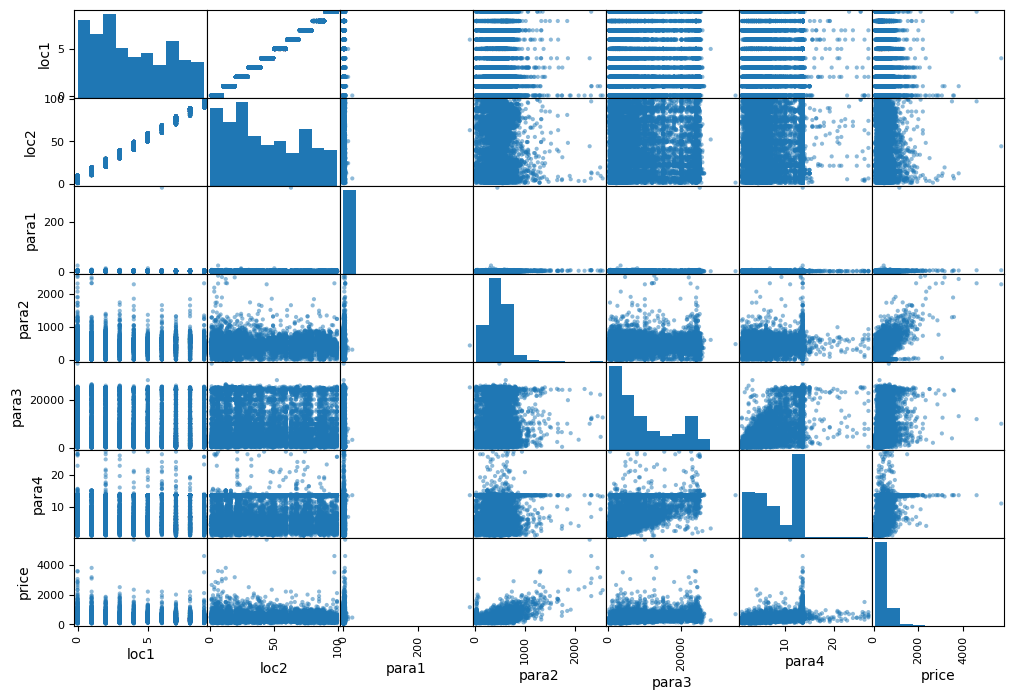

In [14]:
# Suppress the output of the scatter_matrix function
_ = scatter_matrix(result_custom.iloc[:, 0:7], figsize=(12, 8))


Generates a DataFrame named `corr_abs_custom` containing absolute correlations with the "price" column from the `result_custom` DataFrame, sorts the values in descending order, and drops the "loc2" column. Finally, selects columns 0 to 5 (inclusive) from the modified DataFrame, resulting in a DataFrame named `selected_columns_custom`.


In [16]:
# Create a DataFrame of absolute correlations with "price" column and sort values
corr_abs_custom = pd.DataFrame(abs(result_custom.corr()["price"])).sort_values(by="price", ascending=False)[1:]
# Drop the "loc2" column from the result DataFrame
result_custom.drop(columns="loc2", inplace=True)
# Select columns from 0 to 5 (inclusive) from the result DataFrame
selected_columns_custom = result_custom.iloc[:, 0:6]
selected_columns_custom

,loc1,para1,para2,para3,para4,price
0,0.0,1,662,3000.0,3.8,73.49
1,9.0,1,340,2760.0,9.2,300.00
2,0.0,0,16,2700.0,3.0,130.00
3,4.0,1,17,12320.0,6.4,365.00
4,5.0,1,610,2117.0,10.8,357.50
...,...,...,...,...,...,...
9995,9.0,3,386,5000.0,12.0,460.00
9996,7.0,1,386,3250.0,8.0,325.00
9997,0.0,0,190,8856.0,5.6,133.33
9998,7.0,3,717,5000.0,13.6,820.00


Plots histograms for selected columns from 0 to 5 (inclusive) in the `selected_columns_custom` DataFrame with a specified number of bins (50) and figsize, then displays the plot.

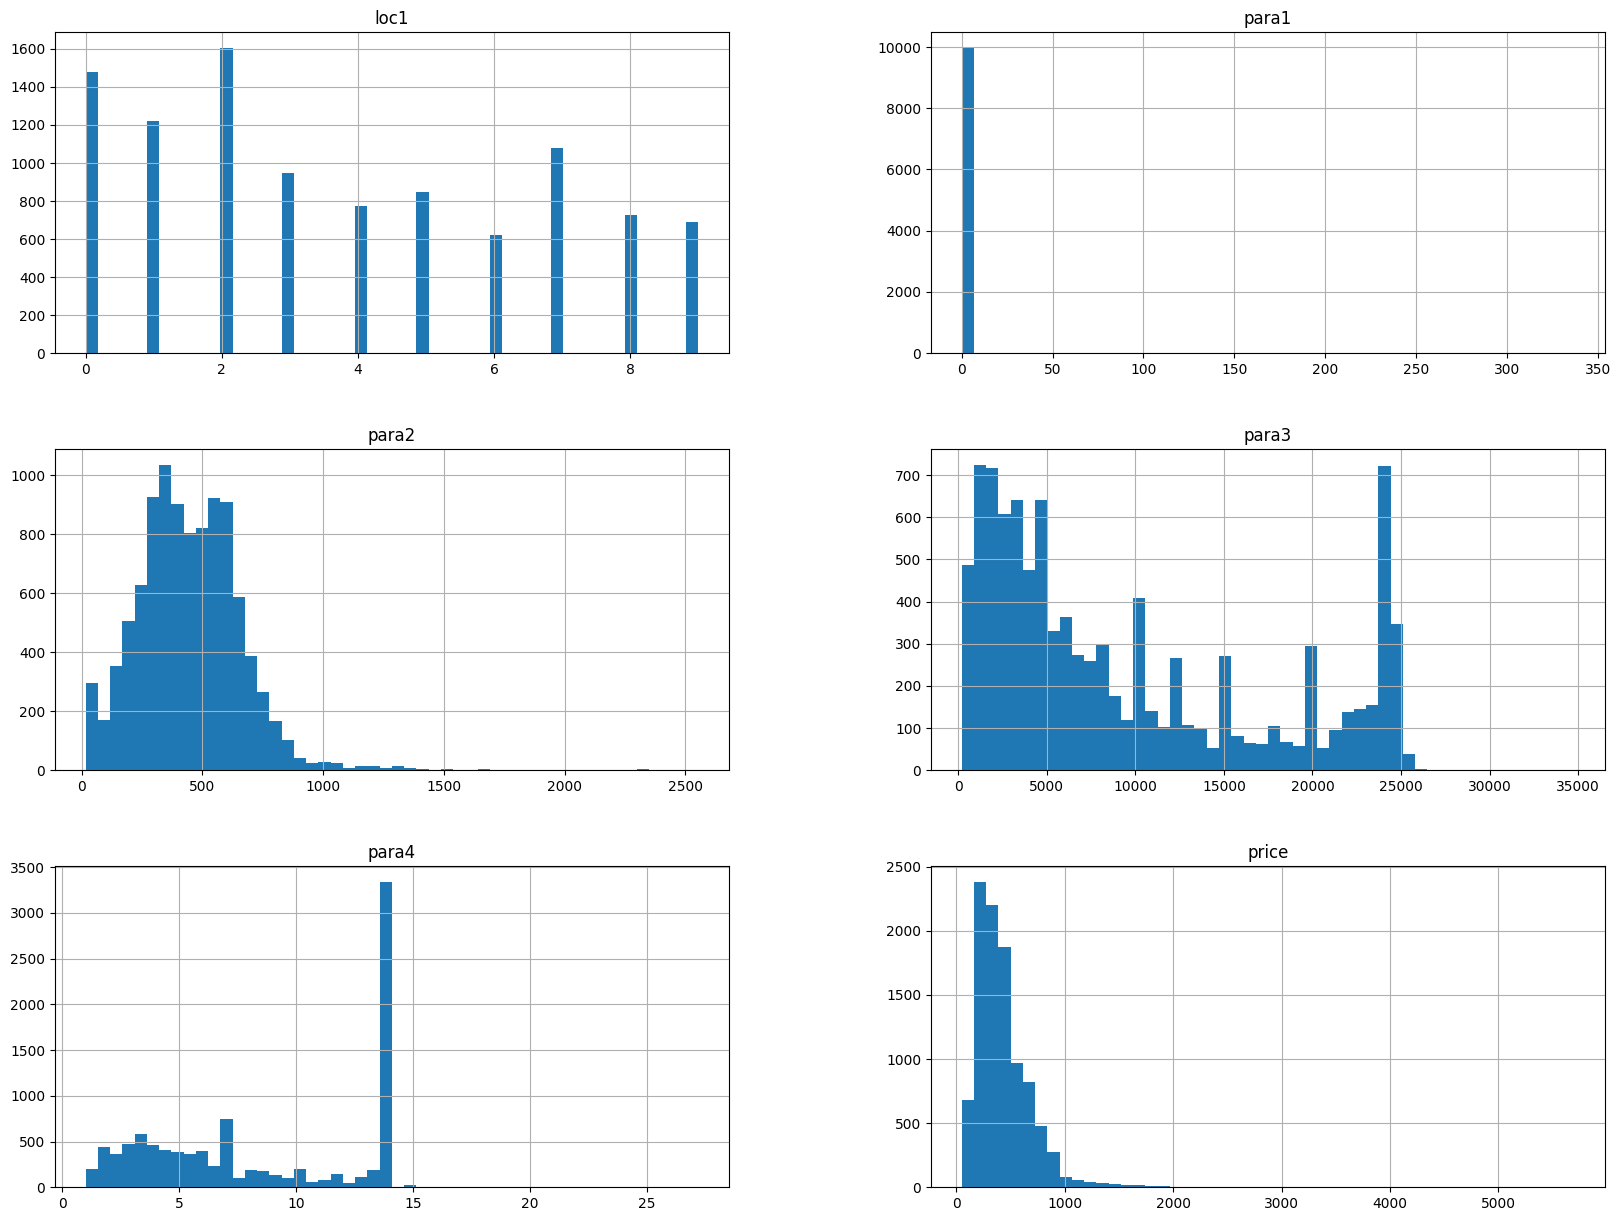

In [17]:
# Plot histograms for selected columns from 0 to 5 (inclusive) in the result DataFrame
selected_columns_custom.hist(bins=50, figsize=(20, 15))
plt.show()


Sorts the entire DataFrame `result_custom` by the "para1" column in descending order, selects the top 5 rows, and stores them in a DataFrame named `top5_custom`. Additionally, filters rows in the `result_custom` DataFrame where the "para1" column is less than 10.

In [18]:
# Sort the entire DataFrame by the "para1" column in descending order and select the top 5 rows
top5_custom = result_custom.sort_values(by="para1", ascending=False).iloc[:, 0:6].head(5)
# Filter rows where "para1" column is less than 10 in the result DataFrame
result_custom = result_custom[result_custom["para1"] < 10]
result_custom

,loc1,para1,para2,para3,para4,price,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0.0,1,662,3000.0,3.8,73.49,0,1,0,0,0,0,0
1,9.0,1,340,2760.0,9.2,300.00,0,0,0,0,1,0,0
2,0.0,0,16,2700.0,3.0,130.00,0,1,0,0,0,0,0
3,4.0,1,17,12320.0,6.4,365.00,0,1,0,0,0,0,0
4,5.0,1,610,2117.0,10.8,357.50,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.0,3,386,5000.0,12.0,460.00,1,0,0,0,0,0,0
9996,7.0,1,386,3250.0,8.0,325.00,0,0,0,0,1,0,0
9997,0.0,0,190,8856.0,5.6,133.33,0,0,0,0,0,1,0
9998,7.0,3,717,5000.0,13.6,820.00,1,0,0,0,0,0,0


<a name="feature-selection"></a>
## Feature Selection

<a name="5-best"></a>
### 5 Best 

Creates a list named `five_best_custom` to store the five best features. Generates a DataFrame named `df_corr_custom` containing correlations with the "price" column, sorts the values in descending order, and selects the top 5 features (excluding the first row, which represents the correlation with "price" itself). Appends the feature names to the list and prints the result.

In [19]:
# Create a list to store the five best features
five_best_custom = []

# Create a DataFrame of correlations with "price" column and sort values
df_corr_custom = pd.DataFrame(result_custom.corr()["price"]).sort_values(by="price", ascending=False)

# Exclude the first row (as it's the correlation with "price" itself) and select the top 5 features
df_5_custom = df_corr_custom.drop(df_corr_custom.index[0]).head(5)

# Append the feature names to the list
for i in range(len(df_5_custom)):
    five_best_custom.append(df_5_custom.index[i])


print(five_best_custom)


['para2', 'para4', 'para3', 'para1', 'Fri']


<a name="3-best"></a>
### 3 Best

Generates a DataFrame named `df_corr_3_custom` containing correlations with the "price" column, sorts the values in descending order, and selects the top 3 features (excluding the first row, which represents the correlation with "price" itself). Creates a list named `three_best_custom` to store the three best features and appends the feature names to the list. The resulting list contains the names of the three best features based on their correlation with the "price" column.

In [20]:
# Create a DataFrame of correlations with "price" column and sort values
df_corr_3_custom = pd.DataFrame(result_custom.corr()["price"]).sort_values(by="price", ascending=False)

# Exclude the first row (as it's the correlation with "price" itself) and select the top 3 features
df_3_custom = df_corr_3_custom.drop(df_corr_3_custom.index[0]).head(3)

# Create a list to store the three best features
three_best_custom = []

# Append the feature names to the list
for i in range(len(df_3_custom)):
    three_best_custom.append(df_3_custom.index[i])

three_best_custom

['para2', 'para4', 'para3']

<a name="machine-learning"></a>
# Machine Learning

<a name="regression-models"></a>
## Regression Models

Defines feature sets using the modified DataFrame `result_custom`. The feature sets include the full dataset without the "price" column (`full_dataset`), a subset of the dataset with the three best features (`three_best`), and a subset with the five best features (`five_best`).

In [22]:
# Define feature sets using the modified DataFrame
feature_sets_custom = {
    "full_dataset": result_custom.drop(columns=['price']),
    "three_best": result_custom[three_best_custom],
    "five_best": result_custom[five_best_custom],
}

Defines regression models with modified imports. The models include Ridge, Decision Tree, Random Forest, XGBoost, LGBM, and MLP, each initialized with a common random state (random_state=42).

In [23]:
# Define regression models with modified imports
regression_models_custom = {
    "Ridge": Ridge(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42, max_depth=6),
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LGBM": LGBMRegressor(random_state=42),
    "MLP": MLPRegressor(random_state=42),
}


Defines a function named `make_regression` that trains a regression model, evaluates its performance on both training and test sets, and prints relevant metrics. The function takes input features (`x_train` and `x_test`), target values (`y_train` and `y_test`), a regression model (`model`), the model's name (`model_name`), and an optional `verbose` parameter for controlling whether to print the metrics. The function returns the trained model along with predictions and evaluation metrics.

In [24]:
def make_regression(x_train, y_train, x_test, y_test, model, model_name, verbose=True):
    
    model.fit(x_train, y_train)
    y_predict_train = model.predict(x_train)
    train_error = mean_squared_error(y_train, y_predict_train, squared=False)
    
    y_predict_test = model.predict(x_test)
    test_error = mean_squared_error(y_test, y_predict_test, squared=False)
    
    r2_train = r2_score(y_train, y_predict_train)
    
    if verbose:
        print("----Model name = {}-----".format(model_name))
        print("Train error = {}".format(train_error))
        print("Test error = {}".format(test_error))
        print("R^2 score (Train) = {}".format(r2_train))
        print("--------------------------------")
    
    trained_model = model
    return trained_model, y_predict_train, train_error, test_error, r2_train


Initializes a dictionary named `pred_dict_custom` to store regression model predictions and evaluation metrics. It then loops through feature sets and regression models, performs train-test split, trains regression models using the `make_regression` function, and populates the dictionary with model names, feature set names, train errors, test errors, and R2 scores.

In [26]:
# Initialize the prediction dictionary
pred_dict_custom = {
    "regression_model": [],
    "feature_set": [],
    "Train Error": [],
    "Test Error": [],
    "R2": []
}

# Loop through feature sets and regression models
for feature_set_name in feature_sets_custom.keys():
    feature_set_custom = feature_sets_custom[feature_set_name]
    print("Included columns are {}".format(feature_set_name))
    for model_name in regression_models_custom.keys():
        y_custom = result_custom["price"]
        x_custom = feature_set_custom
        x_train_custom, x_test_custom, y_train_custom, y_test_custom = train_test_split(x_custom, y_custom, test_size=0.2, random_state=42)
        trained_model_custom, y_predict_custom, train_error_custom, test_error_custom, r2_custom = make_regression(x_train_custom, y_train_custom, x_test_custom, y_test_custom, model_name=model_name, model=regression_models_custom[model_name])
        pred_dict_custom["regression_model"].append(model_name)
        pred_dict_custom["feature_set"].append(feature_set_name)
        pred_dict_custom["Train Error"].append(train_error_custom)
        pred_dict_custom["Test Error"].append(test_error_custom)
        pred_dict_custom["R2"].append(r2_custom)


Included columns are full_dataset
----Model name = Ridge-----
Train error = 184.59832051803974
Test error = 174.0215607338767
R^2 score (Train) = 0.5581137570721937
--------------------------------
----Model name = DecisionTree-----
Train error = 143.4710632890469
Test error = 169.30069889199896
R^2 score (Train) = 0.7330784586795994
--------------------------------
----Model name = RandomForest-----
Train error = 57.75571879548165
Test error = 154.36893753359774
R^2 score (Train) = 0.9567441374542804
--------------------------------
----Model name = XGBoost-----
Train error = 80.73038722087912
Test error = 156.18825838730922
R^2 score (Train) = 0.9154859213576304
--------------------------------
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data

Create a DataFrame from the prediction dictionary

In [27]:
pred_df_custom = pd.DataFrame(pred_dict_custom)
pred_df_custom.head(5)


,regression_model,feature_set,Train Error,Test Error,R2
0,Ridge,full_dataset,184.598321,174.021561,0.558114
1,DecisionTree,full_dataset,143.471063,169.300699,0.733078
2,RandomForest,full_dataset,57.755719,154.368938,0.956744
3,XGBoost,full_dataset,80.730387,156.188258,0.915486
4,LGBM,full_dataset,124.167612,148.875820,0.800073


Creates a new column named "feature_set_2" in the DataFrame `pred_df_custom` by extracting the first part of the "feature_set" column using the lambda function and the `split` method. Then, a new column named "Model_with_Data_set" is created by combining the "regression_model" and "feature_set_2" columns.

In [ ]:
# Create a new column "feature_set_2" by extracting the first part of the "feature_set" column
pred_df_custom["feature_set_2"] = pred_df_custom["feature_set"].apply(lambda x: x.split('_')[0])
# Create a new column "Model_with_Data_set" by combining "regression_model" and "feature_set_2" columns
pred_df_custom["Model_with_Data_set"] = pred_df_custom['regression_model'] + "_" + pred_df_custom["feature_set_2"]

Creates a new DataFrame named `df_barh_custom` containing selected columns "Train Error," "Test Error," "R2," and "Model_with_Data_set" from the DataFrame `pred_df_custom`.

In [29]:
# Create a DataFrame with selected columns
df_barh_custom = pred_df_custom[["Train Error", "Test Error", "R2", "Model_with_Data_set"]]
df_barh_custom

,Train Error,Test Error,R2,Model_with_Data_set
0,184.598321,174.021561,0.558114,Ridge_full
1,143.471063,169.300699,0.733078,DecisionTree_full
2,57.755719,154.368938,0.956744,RandomForest_full
3,80.730387,156.188258,0.915486,XGBoost_full
4,124.167612,148.875820,0.800073,LGBM_full
5,188.712371,177.921450,0.538198,MLP_full
6,185.755645,174.905794,0.552556,Ridge_three
7,146.769769,174.302260,0.720663,DecisionTree_three
8,64.042672,169.882390,0.946814,RandomForest_three
9,98.261916,185.054968,0.874794,XGBoost_three


Creates three horizontal bar graphs in a single figure using subplots. The first graph displays R-squared values, the second graph displays Train Errors, and the third graph displays Test Errors. The bars represent different regression models with varying feature sets. The figure is then displayed using `plt.show()`.

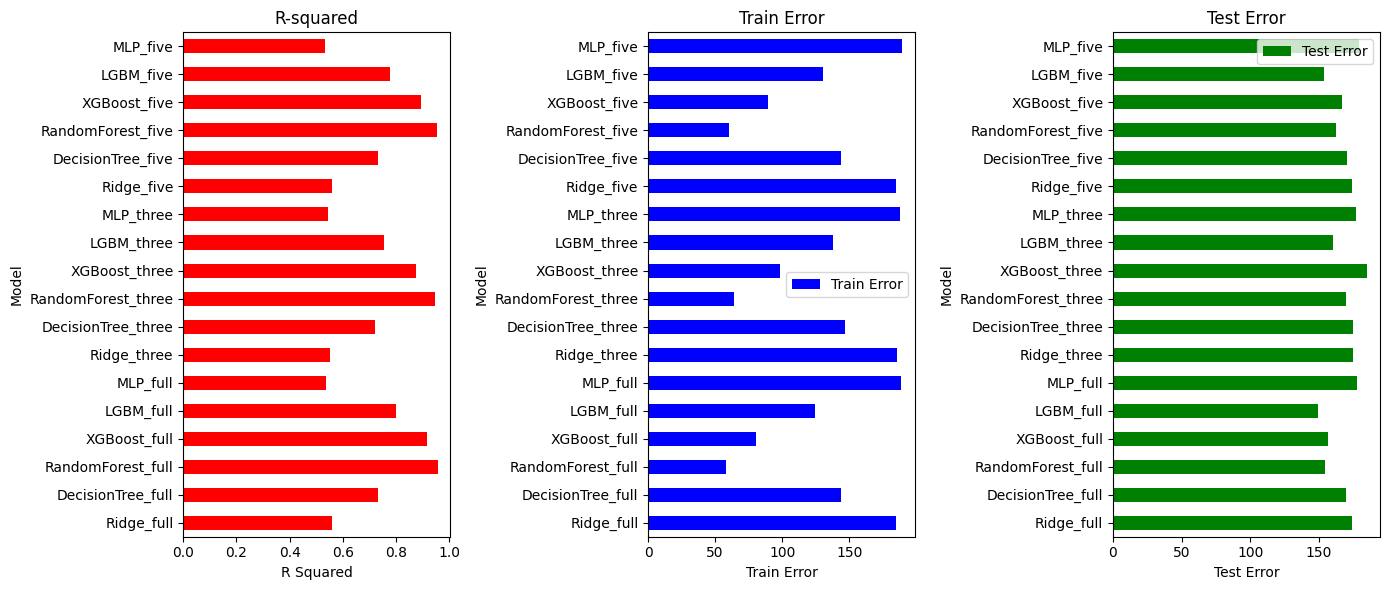

In [30]:
# Create DataFrames with selected columns
df_train_error_custom = df_barh_custom[['Model_with_Data_set', 'Train Error']]
df_test_error_custom = df_barh_custom[['Model_with_Data_set', 'Test Error']]

# Create a figure and subplots
fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(14, 6))

# Create the first graph
df_barh_custom.plot(kind='barh', x='Model_with_Data_set', y='R2', color='red', ax=ax2, legend=False)
ax2.set_xlabel('R Squared')
ax2.set_ylabel('Model')
ax2.set_title('R-squared')

# Create the second graph
df_train_error_custom.plot(kind='barh', x='Model_with_Data_set', y='Train Error', color='blue', ax=ax3)
ax3.set_xlabel('Train Error')
ax3.set_ylabel('Model')
ax3.set_title('Train Error')

# Create the third graph
df_test_error_custom.plot(kind='barh', x='Model_with_Data_set', y='Test Error', color='green', ax=ax4)
ax4.set_xlabel('Test Error')
ax4.set_ylabel('Model')
ax4.set_title('Test Error')

# Fit the figure
plt.tight_layout()

# Show the figure
plt.show()


Drop specified columns from the DataFrame

In [31]:
pred_df_custom.drop(columns=['feature_set_2', 'Model_with_Data_set'], inplace=True)


<a name="model-evaluation"></a>
# Model Evaluation

<a name="highest-r-squared"></a>
### Highest R Squared

Sorts the DataFrame `pred_df_custom` by the "R2" column in descending order and selects the top 5 rows, storing the result in a DataFrame named `top5_r2_custom`.

In [33]:
# Sort the DataFrame by "R2" column in descending order and select the top 5 rows
top5_r2_custom = pred_df_custom.sort_values(by="R2", ascending=False).head(5)
top5_r2_custom

,regression_model,feature_set,Train Error,Test Error,R2
2,RandomForest,full_dataset,57.755719,154.368938,0.956744
14,RandomForest,five_best,60.181668,162.560967,0.953034
8,RandomForest,three_best,64.042672,169.882390,0.946814
3,XGBoost,full_dataset,80.730387,156.188258,0.915486
15,XGBoost,five_best,89.557364,166.404869,0.895994


<a name="min-test-error"></a>
### Min Test Error

Sorts the DataFrame `pred_df_custom` by the "Test Error" column in ascending order and selects the top 5 rows, displaying the result using the `head(5)` method.

In [35]:
# Sort the DataFrame by "Test Error" column in ascending order and select the top 5 rows
top5_test_error_custom = pred_df_custom.sort_values(by="Test Error", ascending=True)
top5_test_error_custom.head(5)

,regression_model,feature_set,Train Error,Test Error,R2
4,LGBM,full_dataset,124.167612,148.875820,0.800073
16,LGBM,five_best,130.521784,153.672366,0.779087
2,RandomForest,full_dataset,57.755719,154.368938,0.956744
3,XGBoost,full_dataset,80.730387,156.188258,0.915486
10,LGBM,three_best,137.862090,160.132623,0.753541


<a name="min-train-error"></a>
### Min Train Error

Sorts the DataFrame `pred_df_custom` by the "Train Error" column in ascending order and selects the top 5 rows, displaying the result using the `head()` method.

In [36]:
# Sort the DataFrame by "Train Error" column in ascending order and select the top 5 rows
top5_train_error_custom = pred_df_custom.sort_values(by="Train Error", ascending=True)
top5_train_error_custom.head()

,regression_model,feature_set,Train Error,Test Error,R2
2,RandomForest,full_dataset,57.755719,154.368938,0.956744
14,RandomForest,five_best,60.181668,162.560967,0.953034
8,RandomForest,three_best,64.042672,169.882390,0.946814
3,XGBoost,full_dataset,80.730387,156.188258,0.915486
15,XGBoost,five_best,89.557364,166.404869,0.895994


<a name="grid-search-in-random-forest"></a>
### Grid Search in Random Forest

Splits the data into training and testing sets, creates and trains a RandomForestRegressor model, and makes predictions on both the training and test sets. The script then calculates and prints the training error, test error, and R^2 score for the RandomForestRegressor model.

In [37]:
# Split the data into training and testing sets
x_custom = result_custom.drop(columns=['price'])
y_custom = result_custom["price"]
x_train_custom, x_test_custom, y_train_custom, y_test_custom = train_test_split(x_custom, y_custom, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor model
model_custom = RandomForestRegressor(random_state=42)
model_name_custom = "Random Forest"
model_custom.fit(x_train_custom, y_train_custom)

# Make predictions on the training set
y_predict_train_custom = model_custom.predict(x_train_custom)
train_error_custom = mean_squared_error(y_train_custom, y_predict_train_custom, squared=False)

# Make predictions on the test set
y_predict_test_custom = model_custom.predict(x_test_custom)
test_error_custom = mean_squared_error(y_test_custom, y_predict_test_custom, squared=False)

# Calculate R^2 score on the training set
r2_train_custom = r2_score(y_train_custom, y_predict_train_custom)

# Print the results
print("----Model name = {}-----".format(model_name_custom))
print("Train error = {}".format(train_error_custom))
print("Test error = {}".format(test_error_custom))
print("R^2 score (Train) = {}".format(r2_train_custom))
print("===========================================================")


----Model name = Random Forest-----
Train error = 57.75571879548165
Test error = 154.36893753359774
R^2 score (Train) = 0.9567441374542804


Retrieves and prints the parameters of the trained RandomForestRegressor model using the `get_params()` method. The resulting dictionary contains the model's configuration.

In [38]:
# Get the parameters of the trained RandomForestRegressor model
model_params_custom = model_custom.get_params()
print(model_params_custom)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Creates a parameter grid for a RandomForestRegressor based on the results of a random search. Then, a base RandomForestRegressor model is instantiated, and a GridSearchCV model is created with the specified parameter grid. The GridSearchCV model is fitted to the training data, and the best parameters are printed.

In [42]:
# Create the parameter grid based on the results of random search
param_grid = {
'bootstrap': [True],
'ccp_alpha' : [0.0],
'criterion': ['squared_error'],
'max_depth': [None],
'max_features': ['auto'],
'max_leaf_nodes' : [None],
'max_samples' : [None],
'min_impurity_decrease' : [0.0],
'min_samples_leaf': [1],
'min_samples_split': [2],
'min_weight_fraction_leaf' : [0.0],
'n_estimators': [50, 500, 700,],
'n_jobs' : [None],
'oob_score' :[True, False],
'random_state' : [42],
'verbose' : [0],
'warm_start' : [True, False],
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
cv = 3, n_jobs = -1, verbose = 0, scoring = 'neg_mean_squared_error')
# Fit the grid search to the data
grid_search.fit(x_train_custom, y_train_custom)

# Get the best parameters from the grid search
best_params_custom = grid_search.best_params_
print("Best Parameters:", best_params_custom)

/home/qritrim/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/qritrim/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/qritrim/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value

Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 700, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': True}


Sets the best parameters obtained from the grid search to a RandomForestRegressor model, fits the model to the training data, and makes predictions on both the training and test sets. The script then calculates and prints the training error, test error, and R^2 score for the RandomForestRegressor model using the optimized parameters.

In [43]:
x = result_custom.drop(columns=['price'])
y = result_custom["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
model = RandomForestRegressor()

# Set the best parameters obtained from the grid search
model.set_params(**best_params_custom)

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the training set
y_predict_train_gr = model.predict(x_train)
train_error_gr = mean_squared_error(y_train, y_predict_train_gr, squared=False)

# Make predictions on the test set
y_predict_test_gr = model.predict(x_test)
test_error_gr = mean_squared_error(y_test, y_predict_test_gr, squared=False)

# Calculate R^2 score on the training set
r2_train_gr = r2_score(y_train, y_predict_train_gr)

# Print the results
print("----Model name = {}-----".format("Random Forest"))
print("Train error = {}".format(train_error_gr))
print("Test error = {}".format(test_error_gr))
print("R^2 score (Train) = {}".format(r2_train_gr))
print("--------------------------------")


/home/qritrim/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


----Model name = Random Forest-----
Train error = 56.51226576818291
Test error = 154.25749133821523
R^2 score (Train) = 0.9585866435847453
--------------------------------


<a name="scaling"></a>
# Scaling

<a name="min-max-scaling"></a>
### Min-Max Scaling

Separates the features (`x`) and the target variable (`y`) from the `result_custom` DataFrame. It then creates a `MinMaxScaler` for the features (`x_scaler`), scales the features using `fit_transform`, and reshapes the target variable (`y`) to a 2D array. Another `MinMaxScaler` is created for the target variable (`y_scaler`), and the target variable is scaled using `fit_transform`.

In [45]:
# Separate features and target variable
x = result_custom.drop(columns=['price'])
y = result_custom["price"]

# Create MinMaxScaler for features
x_scaler = MinMaxScaler()
x_scaled = x_scaler.fit_transform(x)

# Reshape y to a 2D array
y_reshaped = np.asanyarray(y).reshape(-1, 1)

# Create MinMaxScaler for the target variable
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y_reshaped)


Split the scaled features and scaled target variable

In [46]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    x_scaled, y_scaled, test_size=0.2, random_state=42
)


Creates a RandomForestRegressor model, sets the best parameters obtained from the grid search, and fits the model to the scaled training data (`x_train_scaled`, `y_train_scaled`). It then makes predictions on the scaled training set, inversely transforms the predictions to the original scale using `y_scaler.inverse_transform`, and calculates the RMSE (Root Mean Squared Error) and R^2 score on the original scale. The results are printed for the training set.

In [47]:
# Create RandomForestRegressor model
model = RandomForestRegressor()

# Set the best parameters obtained from the grid search
model.set_params(**best_params_custom)

# Fit the model to the scaled training data
model.fit(x_train_scaled, y_train_scaled)

# Make predictions on the scaled training set
y_predict_scaled = model.predict(x_train_scaled)

# Inverse transform the predictions to the original scale
y_predict_train_minmax = y_scaler.inverse_transform(y_predict_scaled.reshape(-1, 1))

# Calculate RMSE on the original scale
rmse_error_train_minmax = mean_squared_error(y_train, y_predict_train_minmax[:, 0], squared=False)

# Calculate R^2 score on the original scale
r2_mm = r2_score(y_train, y_predict_train_minmax)

# Print the results
print("RMSE on the original scale (Train): {}".format(rmse_error_train_minmax))
print("R^2 score on the original scale (Train): {}".format(r2_mm))


/tmp/ipykernel_6096/3625174680.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_scaled, y_train_scaled)
/home/qritrim/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE on the original scale (Train): 56.52133745798042
R^2 score on the original scale (Train): 0.9585733466740054


Makes predictions on the scaled test set (`x_test_scaled`), inversely transforms the predictions to the original scale using `y_scaler.inverse_transform`, and calculates the RMSE (Root Mean Squared Error) on the original scale for the test set. The result is printed for the test set.

In [48]:
# Make predictions on the scaled test set
y_predict_test_scaled = model.predict(x_test_scaled)

# Inverse transform the predictions to the original scale
y_predict_test_minmax = y_scaler.inverse_transform(y_predict_test_scaled.reshape(-1, 1))

# Calculate RMSE on the original scale for the test set
rmse_error_test_minmax = mean_squared_error(y_test, y_predict_test_minmax[:, 0], squared=False)

# Print the result
print("RMSE on the original scale (Test): {}".format(rmse_error_test_minmax))


RMSE on the original scale (Test): 152.96673151125947


<a name="standard-scaling"></a>
### Standard Scaling

Separates the features (`x`) and the target variable (`y`) from the `result_custom` DataFrame. It then creates a `StandardScaler` for the features (`x_scaler`), scales the features using `fit_transform`, and reshapes the target variable (`y`) to a 2D array. Another `StandardScaler` is created for the target variable (`y_scaler`), and the target variable is scaled using `fit_transform`.

In [49]:
# Separate features and target variable
x = result_custom.drop(columns=['price'])
y = result_custom["price"]

# Create StandardScaler for features
x_scaler = StandardScaler()
x_scaled = x_scaler.fit_transform(x)

# Reshape y to a 2D array
y_reshaped = np.asanyarray(y).reshape(-1, 1)

# Create StandardScaler for the target variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y_reshaped)


In [50]:
# Split the scaled features and scaled target variable
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    x_scaled, y_scaled, test_size=0.2, random_state=42
)


Creates a RandomForestRegressor model (`model_standard`), sets the best parameters obtained from the grid search, and fits the model to the scaled training data (`x_train_scaled`, `y_train_scaled`). It then makes predictions on the scaled training set, inversely transforms the predictions to the original scale using `y_scaler.inverse_transform`, and calculates the RMSE (Root Mean Squared Error) and R^2 score on the original scale. The results are printed for the training set.

In [51]:
# Create RandomForestRegressor model
model_standard = RandomForestRegressor()

# Set the best parameters obtained from the grid search
model_standard.set_params(**best_params_custom)

# Fit the model to the scaled training data
model_standard.fit(x_train_scaled, y_train_scaled)

# Make predictions on the scaled training set
y_predict_scaled_standard = model_standard.predict(x_train_scaled)

# Inverse transform the predictions to the original scale
y_predict_train_standard = y_scaler.inverse_transform(y_predict_scaled_standard.reshape(-1, 1))

# Calculate RMSE on the original scale
rmse_error_train_standard = mean_squared_error(y_train, y_predict_train_standard[:, 0], squared=False)

# Calculate R^2 score on the original scale
r2_standard = r2_score(y_train, y_predict_train_standard)

# Print the results
print("RMSE on the original scale (Train): {}".format(rmse_error_train_standard))
print("R^2 score on the original scale (Train): {}".format(r2_standard))


/tmp/ipykernel_6096/956156279.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_standard.fit(x_train_scaled, y_train_scaled)
/home/qritrim/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE on the original scale (Train): 56.487107113560775
R^2 score on the original scale (Train): 0.9586235089411177


Makes predictions on the scaled test set (`x_test_scaled`), inversely transforms the predictions to the original scale using `y_scaler.inverse_transform`, and calculates the RMSE (Root Mean Squared Error) on the original scale for the test set. The result is printed for the test set.


In [52]:
# Make predictions on the scaled test set
y_predict_test_scaled_standard = model_standard.predict(x_test_scaled)

# Inverse transform the predictions to the original scale
y_predict_test_standard = y_scaler.inverse_transform(y_predict_test_scaled_standard.reshape(-1, 1))

# Calculate RMSE on the original scale for the test set
rmse_error_test_standard = mean_squared_error(y_test, y_predict_test_standard[:, 0], squared=False)

# Print the result
print("RMSE on the original scale (Test): {}".format(rmse_error_test_standard))


RMSE on the original scale (Test): 154.47542594533306


<a name="robust-scaling"></a>
### Robust Scaling

Separates the features (`x`) and the target variable (`y`) from the `result_custom` DataFrame. It then creates a `RobustScaler` for the features (`x_scaler`), scales the features using `fit_transform`, and reshapes the target variable (`y`) to a 2D array. Another `RobustScaler` is created for the target variable (`y_scaler`), and the target variable is scaled using `fit_transform`.

In [53]:
# Separate features and target variable
x = result_custom.drop(columns=['price'])
y = result_custom["price"]

# Create RobustScaler for features
x_scaler = RobustScaler()
x_scaled = x_scaler.fit_transform(x)

# Reshape y to a 2D array
y_reshaped = np.asanyarray(y).reshape(-1, 1)

# Create RobustScaler for the target variable
y_scaler = RobustScaler()
y_scaled = y_scaler.fit_transform(y_reshaped)


In [54]:
# Split the scaled features and scaled target variable
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    x_scaled, y_scaled, test_size=0.2, random_state=42
)


Creates a RandomForestRegressor model (`model_robust`), sets the best parameters obtained from the grid search, and fits the model to the scaled training data (`x_train_scaled`, `y_train_scaled`). It then makes predictions on the scaled training set, inversely transforms the predictions to the original scale using `y_scaler.inverse_transform`, and calculates the RMSE (Root Mean Squared Error) and R^2 score on the original scale. The results are printed for the training set.

In [55]:
# Create RandomForestRegressor model
model_robust = RandomForestRegressor()

# Set the best parameters obtained from the grid search
model_robust.set_params(**best_params_custom)

# Fit the model to the scaled training data
model_robust.fit(x_train_scaled, y_train_scaled)

# Make predictions on the scaled training set
y_predict_scaled_robust = model_robust.predict(x_train_scaled)

# Inverse transform the predictions to the original scale
y_predict_train_robust = y_scaler.inverse_transform(y_predict_scaled_robust.reshape(-1, 1))

# Calculate RMSE on the original scale
rmse_error_train_robust = mean_squared_error(y_train, y_predict_train_robust[:, 0], squared=False)

# Calculate R^2 score on the original scale
r2_robust = r2_score(y_train, y_predict_train_robust)

# Print the results
print("RMSE on the original scale (Train): {}".format(rmse_error_train_robust))
print("R^2 score on the original scale (Train): {}".format(r2_robust))


/tmp/ipykernel_6096/3773187521.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_robust.fit(x_train_scaled, y_train_scaled)
/home/qritrim/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE on the original scale (Train): 56.57405224249394
R^2 score on the original scale (Train): 0.9584960372696737


Makes predictions on the scaled test set (`x_test_scaled`), inversely transforms the predictions to the original scale using `y_scaler.inverse_transform`, and calculates the RMSE (Root Mean Squared Error) on the original scale for the test set. The result is printed for the test set.

In [56]:
# Make predictions on the scaled test set
y_predict_test_scaled_robust = model_robust.predict(x_test_scaled)

# Inverse transform the predictions to the original scale
y_predict_test_robust = y_scaler.inverse_transform(y_predict_test_scaled_robust.reshape(-1, 1))

# Calculate RMSE on the original scale for the test set
rmse_error_test_robust = mean_squared_error(y_test, y_predict_test_robust[:, 0], squared=False)

# Print the result
print("RMSE on the original scale (Test): {}".format(rmse_error_test_robust))


RMSE on the original scale (Test): 154.41777733963616


Creates a dictionary `pred_dict` containing training errors, test errors, and R^2 scores for different techniques (Grid Search, Min-Max Scaling, Standard Scaling, Robust Scaling). The dictionary is then used to create a DataFrame named `results_df`, and the DataFrame is printed or displayed.

In [61]:
pred_dict = {
    "technique": ["Grid Search", "Min-Max Scaling", "Standard-Scaling", "Robust-Scaling"],
    "Train Error": [train_error_gr, rmse_error_train_minmax, rmse_error_train_standard, rmse_error_train_robust],
    "Test Error": [test_error_gr, rmse_error_test_minmax, rmse_error_test_standard, rmse_error_test_robust],
    "R2": [r2_train_custom, r2_mm, r2_standard, r2_robust]
}
# Create a DataFrame from the pred_dict
results_df = pd.DataFrame(pred_dict)
# Print or display the DataFrame
(results_df)



,technique,Train Error,Test Error,R2
0,Grid Search,56.512266,154.257491,0.956744
1,Min-Max Scaling,56.521337,152.966732,0.958573
2,Standard-Scaling,56.487107,154.475426,0.958624
3,Robust-Scaling,56.574052,154.417777,0.958496


Creates three bar graphs in a single figure using subplots. The first graph displays R-squared values, the second graph displays Train Errors, and the third graph displays Test Errors for different techniques (Grid Search, Min-Max Scaling, Standard Scaling, Robust Scaling). The figure is then displayed using `plt.show()`.

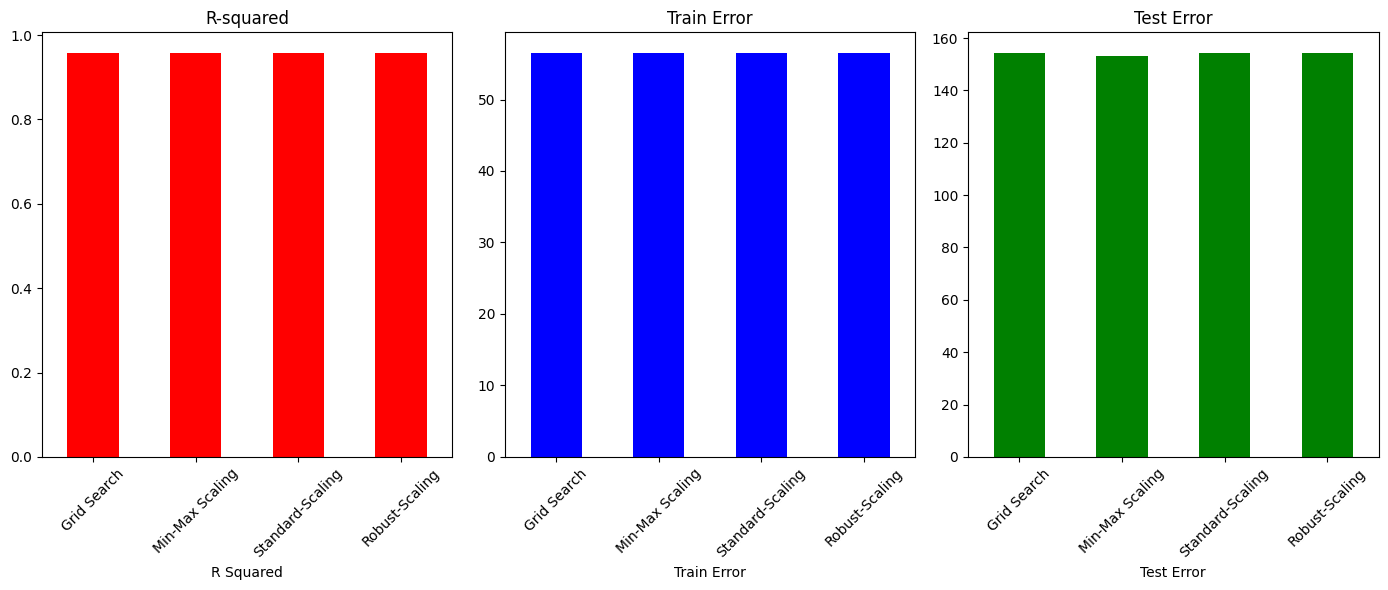

In [60]:
# Create a figure and subplots
fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(14, 6))

# Create the first graph (R^2)
results_df.plot(kind='bar', x='technique', y='R2', color='red', ax=ax2, legend=False)
ax2.set_xlabel('R Squared')
ax2.set_title('R-squared')
ax2.tick_params(axis='x', labelrotation=45)

# Create the second graph (Train Error)
results_df.plot(kind='bar', x='technique', y='Train Error', color='blue', ax=ax3, legend=False)
ax3.set_xlabel('Train Error')
ax3.set_title('Train Error')
ax3.tick_params(axis='x', labelrotation=45)

# Create the third graph (Test Error)
results_df.plot(kind='bar', x='technique', y='Test Error', color='green', ax=ax4, legend=False)
ax4.set_xlabel('Test Error')
ax4.set_title('Test Error')
ax4.tick_params(axis='x', labelrotation=45)

# Fit the figure
plt.tight_layout()

# Show the figure
plt.show()


<a name="deep-learning"></a>
# Deep Learning

Splits the data into training and testing sets using the `train_test_split` function. The target variable is stored in `y`, and the features are stored in `x`. The split is performed with a test size of 20% and a random state of 42. The resulting sets include `x_train`, `x_test` for features, and `y_train`, `y_test` for the target variable.

In [63]:
y = result_custom["price"]
x = result_custom.drop(columns=['price'])

x_train, x_test, y_train, y_test = train_test_split(
    result_custom.drop(columns=['price']),
    result_custom["price"],
    test_size=0.2, random_state=42
)

Defines a Sequential model using TensorFlow's Keras API. The model consists of two layers: a Dense layer with 64 units and ReLU activation function, and another Dense layer with 1 unit. The input shape for the first layer is determined based on the number of features in the training data (`x_train.shape[1]`).

In [64]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=[x_train.shape[1]]),
    tf.keras.layers.Dense(units=1)
])

2024-01-20 11:40:12.160833: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-20 11:40:12.188157: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-20 11:40:12.353684: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-20 11:40:12.354483: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-20 11:40:13.383995: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Compiles the defined model using the Adam optimizer with a learning rate of 0.0001, mean squared error as the loss function, and mean absolute error as the evaluation metric. This prepares the model for training.

In [65]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.losses.MeanSquaredError(),
              metrics=[tf.metrics.MeanAbsoluteError()])

Trains the compiled model (`model`) on the training data (`x_train`, `y_train`). The training is performed for 30 epochs with a batch size of 32. The validation data (`x_test`, `y_test`) is used for validation during training. The training progress is printed with verbosity level set to 1. The training history is stored in the `history` variable.

In [66]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/30
250/250 [==============================] - 1s 1ms/step - loss: 327880.9688 - mean_absolute_error: 416.1401 - val_loss: 175311.2656 - val_mean_absolute_error: 326.7214
Epoch 2/30
250/250 [==============================] - 0s 822us/step - loss: 168714.2031 - mean_absolute_error: 311.0239 - val_loss: 142189.8281 - val_mean_absolute_error: 289.4638
Epoch 3/30
250/250 [==============================] - 0s 991us/step - loss: 134561.2656 - mean_absolute_error: 271.0918 - val_loss: 103632.8281 - val_mean_absolute_error: 237.9765
Epoch 4/30
250/250 [==============================] - 0s 938us/step - loss: 99738.9844 - mean_absolute_error: 223.0833 - val_loss: 80236.8984 - val_mean_absolute_error: 201.4037
Epoch 5/30
250/250 [==============================] - 0s 809us/step - loss: 80239.2344 - mean_absolute_error: 192.3326 - val_loss: 64235.8516 - val_mean_absolute_error: 174.0795
Epoch 6/30
250/250 [==============================] - 0s 897us/step - loss: 66382.1250 - mean_absolute_err

It seems like the provided code is the same as the previous snippet. If you have any specific questions or if there's anything else you'd like assistance with regarding this code, feel free to let me know!

In [67]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/30
250/250 [==============================] - 0s 1ms/step - loss: 42615.5078 - mean_absolute_error: 135.6783 - val_loss: 38072.7344 - val_mean_absolute_error: 137.6646
Epoch 2/30
250/250 [==============================] - 0s 939us/step - loss: 42610.2422 - mean_absolute_error: 136.0047 - val_loss: 38063.3711 - val_mean_absolute_error: 135.8022
Epoch 3/30
250/250 [==============================] - 0s 900us/step - loss: 42629.1211 - mean_absolute_error: 135.9695 - val_loss: 38729.4727 - val_mean_absolute_error: 141.9972
Epoch 4/30
250/250 [==============================] - 0s 835us/step - loss: 42430.4648 - mean_absolute_error: 135.5685 - val_loss: 37968.4844 - val_mean_absolute_error: 135.3116
Epoch 5/30
250/250 [==============================] - 0s 856us/step - loss: 42390.8555 - mean_absolute_error: 135.2881 - val_loss: 38588.6523 - val_mean_absolute_error: 135.3496
Epoch 6/30
250/250 [==============================] - 0s 838us/step - loss: 42487.3672 - mean_absolute_error: 13

Generates a plot showing the Mean Absolute Error (MAE) during training and validation at specific epochs. The blue line represents the training MAE, and the red line represents the validation MAE. The values are extracted from the training history (`history`) for the specified epochs (5, 10, 15, 20, 25, 30). The legend displays the final MAE values for both training and validation sets. The plot is displayed using `plt.show()`.

250/250 [==============================] - 0s 483us/step


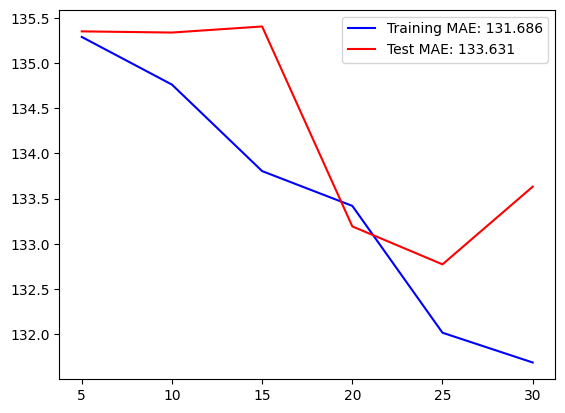

In [68]:
y_train_pred = model.predict(x_train)
r2_first = r2_score(y_train, y_train_pred)
epochs_to_plot = [5, 10, 15, 20, 25, 30]
mae_first = [history.history['mean_absolute_error'][epoch - 1] for epoch in epochs_to_plot]
val_mae_first = [history.history['val_mean_absolute_error'][epoch - 1] for epoch in epochs_to_plot]

plt.plot(epochs_to_plot, mae_first, 'b', label=f'Training MAE: {mae_first[-1]:.3f}')
plt.plot(epochs_to_plot, val_mae_first, 'r', label=f'Test MAE: {val_mae_first[-1]:.3f}')
plt.legend()
plt.show()


This code segment does the following:

1. Defines a neural network model with additional hidden layers (32, 16, and 8 units) and applies L2 regularization to the weights.
2. Compiles the model with a lower learning rate, Mean Squared Error (MSE) loss, and Mean Absolute Error (MAE) metric.
3. Fits the model to the training data for 1000 epochs.
4. Predicts on the training set and calculates the R-squared score on the training set.
5. Selects the MAE and validation MAE for specific epochs (100, 200, ..., 1000).
6. Plots the Training MAE and Test MAE over epochs.
7. Records the execution time for the model training.

The entire process is designed to showcase the impact of regularization and training performance over a more extended period. The training progress plot provides insights into the model's learning behavior over epochs.

The execution time is recorded and printed at the end of the code block.

250/250 [==============================] - 0s 839us/step


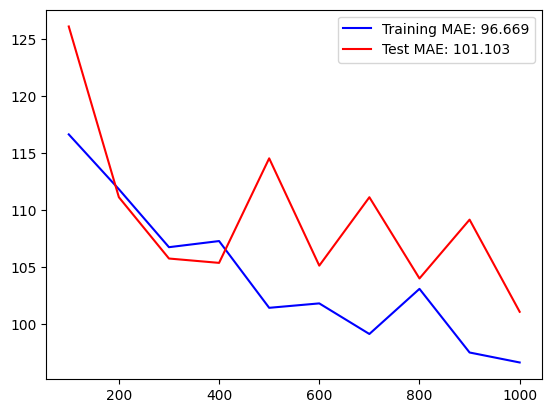

Execution time: 289.36 seconds which is: 4.82 minutes.


In [69]:
# Record the start time for execution time measurement
start = time.time()

# Set a seed for reproducibility
tf.random.set_seed(42)

# Define a neural network model with additional layers and regularization
model = tf.keras.models.Sequential([
    # Input layer with 64 units and ReLU activation, applying L2 regularization
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=[x_train.shape[1]], kernel_regularizer=regularizers.l2(0.01)),
    # Hidden layers with 32, 16, and 8 units, ReLU activation, and L2 regularization
    tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    # Output layer with 1 unit
    tf.keras.layers.Dense(units=1)
])

# Compile the model with a lower learning rate, MSE loss, and MAE metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007),
              loss=tf.losses.MeanSquaredError(),
              metrics=[tf.metrics.MeanAbsoluteError()])

# Fit the model to the training data for 1000 epochs
history = model.fit(x_train, y_train, epochs=1000, batch_size=32, verbose=0, validation_data=(x_test, y_test))

# Predictions on the training set
y_train_pred = model.predict(x_train)

# Calculate R-squared score on the training set
r2_second = r2_score(y_train, y_train_pred)

# Select the MAE and val_MAE for specific epochs
epochs_to_plot = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
mae_second = [history.history['mean_absolute_error'][epoch - 1] for epoch in epochs_to_plot]
val_mae_second = [history.history['val_mean_absolute_error'][epoch - 1] for epoch in epochs_to_plot]

# Plot the MAE and val_MAE
plt.plot(epochs_to_plot, mae_second, 'b', label=f'Training MAE: {mae_second[-1]:.3f}')
plt.plot(epochs_to_plot, val_mae_second, 'r', label=f'Test MAE: {val_mae_second[-1]:.3f}')
plt.legend()
plt.show()

# Record the end time and calculate the execution time
end = time.time()
elapsed_time_seconds = end - start
elapsed_time = (elapsed_time_seconds) / 60
elapsed_time_seconds = round(elapsed_time_seconds, 2)
elapsed_time = round(elapsed_time, 2)
print('Execution time:', elapsed_time_seconds, 'seconds which is:', elapsed_time, 'minutes.')


Creates a DataFrame `pred_df` that summarizes the performance of two scenarios ("DL" and "DL optimized"). The DataFrame includes information on training error (Mean Absolute Error), test error (Mean Absolute Error), and R-squared scores for both scenarios.


These values represent the final metrics for each scenario. The "DL optimized" scenario generally has lower errors and a higher R-squared score, indicating improved model performance.

In [70]:
pred_dict = {
    "Algorithm": ["DL", "DL optimized"],  # Describes the two scenarios
    "Train Error": [mae_first[-1], mae_second[-1]],  # Training Mean Absolute Error for both scenarios
    "Test Error": [val_mae_first[-1], val_mae_second[-1]],  # Test Mean Absolute Error for both scenarios
    "R2": [r2_first, r2_second]  # R-squared scores for both scenarios
}
pred_df = pd.DataFrame(pred_dict)
pred_df

,Algorithm,Train Error,Test Error,R2
0,DL,131.686081,133.630966,0.469185
1,DL optimized,96.668709,101.103447,0.703359


The provided code creates a figure with three subplots, each displaying different metrics for the two scenarios ("DL" and "DL optimized"). Here's what each subplot represents:

1. **R-squared (R2):**
   - The first subplot (top) displays the R-squared scores for both scenarios ("DL" and "DL optimized"). The red bars represent the R-squared values.

2. **Training Error (Mean Absolute Error - MAE) :**
   - The second subplot (middle) displays the training errors (MAE) for both scenarios. The green bars represent the training error values.

3. **Test Error (Mean Absolute Error - MAE):**
   - The third subplot (bottom) displays the test errors (MAE) for both scenarios. The yellow bars represent the test error values.

The `labelrotation=45` parameter is used to rotate the x-axis labels for better visibility. The plot provides a visual comparison of the performance metrics between the two scenarios.

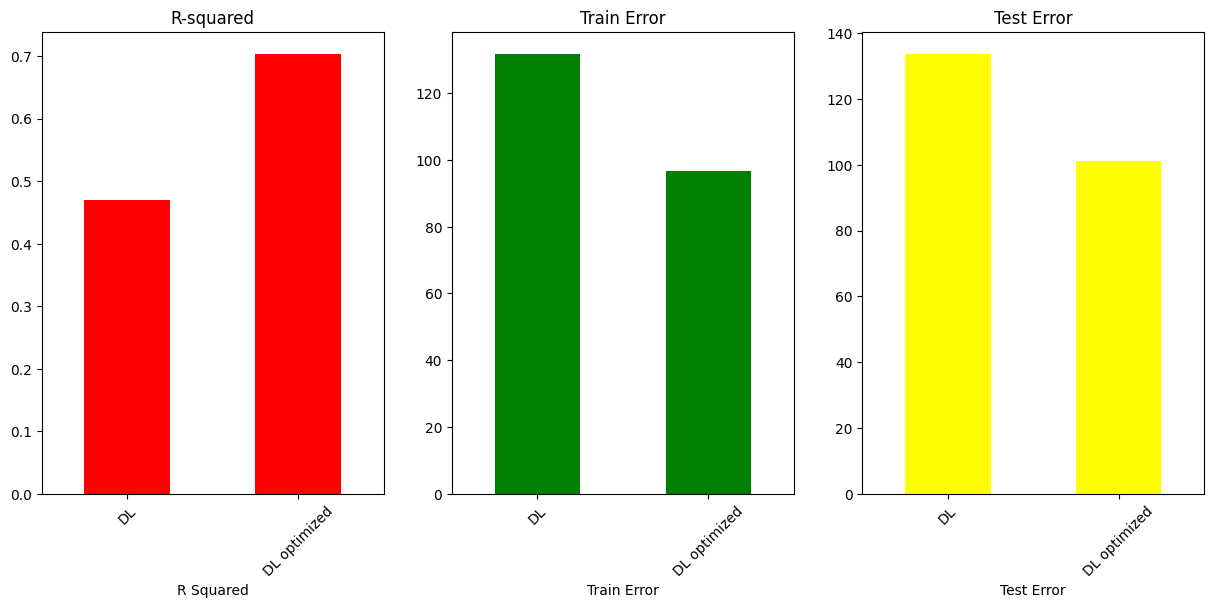

In [74]:
# Create a figure and subplots with 1 row and 3 columns
fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(15, 6))

# Create the first graph (R-squared)
pred_df.plot(kind='bar', x='Algorithm', y='R2', color='red', ax=ax2, legend=False)
ax2.set_xlabel('R Squared')
ax2.set_title('R-squared')
ax2.tick_params(axis='x', labelrotation=45)

# Create the second graph (Training Error)
pred_df.plot(kind='bar', x='Algorithm', y='Train Error', color='green', ax=ax3, legend=False)
ax3.set_xlabel('Train Error')
ax3.set_title('Train Error')
ax3.tick_params(axis='x', labelrotation=45)

# Create the third graph (Test Error)
pred_df.plot(kind='bar', x='Algorithm', y='Test Error', color='yellow', ax=ax4, legend=False)
ax4.set_xlabel('Test Error')
ax4.set_title('Test Error')
ax4.tick_params(axis='x', labelrotation=45)

# Display the subplots
plt.show()
